# Twitter Word Cloud Challenge

We are going to be getting data from Twitter, cleaning it and using the search results to generate a word cloud! We will be using the library `snscrape` to get data from Twitter and `stylecloud` to generate the word cloud!

## Requirement file

Luckily the environment has all the packages you need already installed but we will list them here anyway!

```
stylecloud
git+https://github.com/JustAnotherArchivist/snscrape.git # snscrape from git as Twitter recently introduced breaking changes
pandas
matplotlib
```

## JSON

A way to store data (lists, dictionaries, etc) in a string or file format. An example and exercise is below.

In [1]:
import json

json_example = r'''
{
  "url": "https://twitter.com/ChicagoPython/status/1309180179537952771",
  "date": "2020-09-24T17:17:32+00:00",
  "content": "Get off Twitter!! Join the Chicago Python Livestream on MLOps!\n\n#Python  #MLOps #DataOps #PythonLunchBreak #ChiPy #100DaysOfCode #100DaysOfMLCode \n\nhttps://t.co/7EKjBEvsc0",
  "renderedContent": "Get off Twitter!! Join the Chicago Python Livestream on MLOps!\n\n#Python  #MLOps #DataOps #PythonLunchBreak #ChiPy #100DaysOfCode #100DaysOfMLCode \n\nyoutube.com/watch?v=uClvvl…",
  "id": 1309180179537952800,
  "username": "ChicagoPython",
  "user": {
    "username": "ChicagoPython",
    "displayname": "ChiPy",
    "id": 4145734157,
    "description": "The Chicago Python User Group loves you! 🐿\n\nYouTube: bit.ly/chipy-tube\nUpcoming events: meetup.com/_ChiPy_/",
    "rawDescription": "The Chicago Python User Group loves you! 🐿\n\nYouTube: https://t.co/WzOFvxLloJ\nUpcoming events: https://t.co/qDHRHyxbGW",
    "descriptionUrls": [
      {
        "text": "bit.ly/chipy-tube",
        "url": "http://bit.ly/chipy-tube",
        "tcourl": "https://t.co/WzOFvxLloJ",
        "indices": [
          53,
          76
        ]
      },
      {
        "text": "meetup.com/_ChiPy_/",
        "url": "http://meetup.com/_ChiPy_/",
        "tcourl": "https://t.co/qDHRHyxbGW",
        "indices": [
          94,
          117
        ]
      }
    ],
    "verified": false,
    "created": "2015-11-09T01:26:26+00:00",
    "followersCount": 1467,
    "friendsCount": 1139,
    "statusesCount": 1325,
    "favouritesCount": 634,
    "listedCount": 33,
    "mediaCount": 304,
    "location": "Chicago, IL",
    "protected": false,
    "linkUrl": "http://www.chipy.org",
    "linkTcourl": "https://t.co/PRcBbqRkpO",
    "profileImageUrl": "https://pbs.twimg.com/profile_images/663559306965454848/aBTV9K8l_normal.png",
    "profileBannerUrl": "https://pbs.twimg.com/profile_banners/4145734157/1447037423"
  },
  "outlinks": [
    "https://www.youtube.com/watch?v=uClvvlfJxqo"
  ],
  "outlinksss": "https://www.youtube.com/watch?v=uClvvlfJxqo",
  "tcooutlinks": [
    "https://t.co/7EKjBEvsc0"
  ],
  "tcooutlinksss": "https://t.co/7EKjBEvsc0",
  "replyCount": 0,
  "retweetCount": 3,
  "likeCount": 1,
  "quoteCount": 0,
  "conversationId": 1309180179537952800,
  "lang": "en",
  "source": "<a href=\"https://mobile.twitter.com\" rel=\"nofollow\">Twitter Web App</a>",
  "media": null,
  "retweetedTweet": null,
  "quotedTweet": null,
  "mentionedUsers": null
}
'''

## Exercise 1

Load the JSON example above (don't forget to run the cell) using the `json.loads()` function. Remember, this will turn the json into a python dictionary. Now use it to find the following  information from the tweet.

In [3]:
# Load the JSON example text from above
# INSERT CODE HERE
tweet_dict = json.loads(json_example)
# Print how many times the tweet was retweeted aka the "retweetCount"
# INSERT CODE HERE
print(tweet_dict["retweetCount"])

# Print the link to the meetup from the tweet information
# INSERT CODE HERE
print(tweet_dict["user"]["descriptionUrls"][1]["url"])

3
http://meetup.com/_ChiPy_/


## Exercise 2

Write a function that takes loads example JSON string above and returns the retweet count

In [4]:
# Write your function here
# INSERT CODE HERE

def get_retweet_count(json_example):
    return tweet_dict["retweetCount"]

print(get_retweet_count(json_example))

3


# Saving and Loading JSON to a file

Many times it's not convenient to keep on hitting a URL for a JSON, maybe the website is too slow or there is a limit on how many times a user can access it. In these cases, it's best to save the JSON to a file and read it.

## Exercise 3

In [5]:
# Save the JSON to a file named 'example.json'

with open("./example.json",'w') as f:
    json.dump(tweet_dict,f)

# Load the JSON back from 'example.json' (using json.load)

with open("./example.json") as f:
    json_example2 = json.load(f)


# What is an API?

An API (Application Programmer Interface) is a way a website/app allows a user to programmatically access data.

## Other ways of accessing data

1. Copying and pasting data into a spreadsheet (or plain text file) and reading with Python package `csv` or `pandas` (or if it's a text file, then loop through the lines) 

1. Scraping/parsing the HTML with Python package *Beautiful Soup* (or equivalent)

## API vs. Other Methods

An API is more organized and the way the app wants you to access its data. However many websites or apps don't have an API, or it is too poorly designed. In those cases, it's better to use a more crude approach.

# A Twitter Unofficial API

We will be using an unofficial API to get data called `snscrape`. Typically it is better to use an official API, but we are limited for this challenge to less than 90 minutes. The setup for the official API is more involved and may take up to 24 hours to actually get the API key emailed to you.

The following is a helper function to load the json output command line utility snscrape into a python dictionary. We will be using it to scrape Twitter.

In [6]:
import subprocess

def snscrape(commands):
    result = subprocess.run(['snscrape', '--jsonl'] + commands, stdout=subprocess.PIPE)
    data = result.stdout.decode('utf-8')
    results = [json.loads(jline) for jline in data.splitlines()] # jsonl to json parsed
    return results

We are now ready to search Twitter. Luckily the library snscrape and the code above will do the heavy lifting!

## Exercise 4

Play around with the following api commands `twitter-search` `twitter-user` and `twitter-hashtag`. Feel free to get creative with your searches! Print and see what your tweets look like!

In [7]:

tweets = snscrape(['--max-results', '1000', 'twitter-search','python'])
#tweets

In [8]:
snscrape(['--max-results', '2', 'twitter-user','chicagopython'])


[]

In [9]:
snscrape(['--max-results', '2', 'twitter-hashtag','YOLO'])


[{'url': 'https://twitter.com/brorante/status/1316908871894683654',
  'date': '2020-10-16T01:08:36+00:00',
  'content': '@zoe_brecher six years before Drake did it—so crazy #YOLO',
  'renderedContent': '@zoe_brecher six years before Drake did it—so crazy #YOLO',
  'id': 1316908871894683654,
  'username': 'brorante',
  'user': {'username': 'brorante',
   'displayname': 'brorante',
   'id': 402029709,
   'description': '🦂',
   'rawDescription': '🦂',
   'descriptionUrls': [],
   'verified': False,
   'created': '2011-10-31T13:00:13+00:00',
   'followersCount': 169,
   'friendsCount': 192,
   'statusesCount': 4236,
   'favouritesCount': 2034,
   'listedCount': 0,
   'mediaCount': 455,
   'location': 'Brooklyn, NY',
   'protected': False,
   'linkUrl': None,
   'linkTcourl': None,
   'profileImageUrl': 'https://pbs.twimg.com/profile_images/1264568703569592320/pF3E2U7b_normal.jpg',
   'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/402029709/1590331649'},
  'outlinks': [],
  'outl

## Exercise 5

Unfortunately as you can notice there are a bunch of `https://t.co/xzzzX34xz` URLs and we don't want those there. Write code to remove the URLS with a regular expression

In [10]:
import re

def remove_urls(tweets):
    for tweet in tweets:
        content = tweet['content']
        tweet['content'] = re.sub(r'https://t.co/\w*', '', content)
    return tweets

tweets = remove_urls(tweets)

## Exercise 6

Unfortunately as you can notice many of the tweets are duplicated. Write code to remove duplicates using a dictionary.

In [13]:
tweets[0].keys()

dict_keys(['url', 'date', 'content', 'renderedContent', 'id', 'username', 'user', 'outlinks', 'outlinksss', 'tcooutlinks', 'tcooutlinksss', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount', 'conversationId', 'lang', 'source', 'media', 'retweetedTweet', 'quotedTweet', 'mentionedUsers'])

In [14]:
def remove_duplicates(tweets):
    no_dups = []
    seen_ids = {}
    for tweet in tweets:
        if tweet["content"] not in seen_ids:
            no_dups.append(tweet)
            seen_ids.update({tweet["content"]:''})
    return no_dups

print("NUMBER TWEETS WITH DUPLICATES: {}".format(len(tweets)))
tweets = remove_duplicates(tweets)
print("NUMBER TWEETS WITHOUT DUPLICATES: {}".format(len(tweets)))

NUMBER TWEETS WITH DUPLICATES: 1000
NUMBER TWEETS WITHOUT DUPLICATES: 969


## Exercise 7

We would to further process all tweets in one string without any other junk. Collect all the tweets into one python lowercased string. Use the sample code below

In [15]:
corpus = ''
for tweet in tweets:
    corpus += tweet["content"] +'\t'

In [ ]:
print(corpus)

## Exercise 8

We are going to convert the tweets into text a few times so we can process the next from different searches. Since we don't want to repeat ourself, write a function below that does the following:

- Given the search string, it returns the text from all the results as we found above. 
- Adds the code to remove URLs and duplicates
- Be sure to remove URLS first before removing duplicates. (Twitter adds random characters to links.)
- Don't forget to lowercase

In [20]:
def get_text_from_search(query_data):
    # INSERT CODE HERE
    tweets = snscrape(['--max-results', '1000', 'twitter-search',query_data])
    tweets = remove_urls(tweets)
    tweets = remove_duplicates(tweets)
    corpus = ''
    for tweet in tweets:
        corpus += tweet["content"] +'\t'
    return corpus
    
corpus = get_text_from_search("python")

# Word Cloud

Now that we have some tweet results, we are going to collect all the text into one python string so we can make a word cloud

There are few python libraries that convert text to a word cloud. This one allows us to specify any shape from https://fontawesome.com/ so we will use the twitter logo. Run the code below to see it in action!

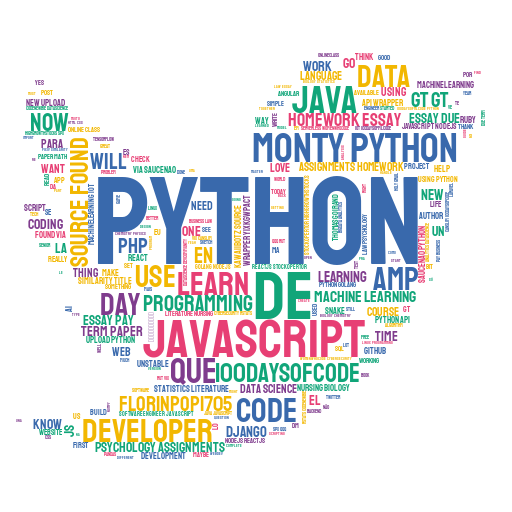

In [21]:
import stylecloud
from IPython.display import Image
import os

filename = 'wordcloud.png'

stylecloud.gen_stylecloud(text=corpus, icon_name='fab fa-twitter', output_name=filename)
Image(filename=filename)

## Exercise 10

Unfortunately our word cloud is not perfect. First of all our words that we searched for are showing up. We are searching for them so they are gonna have to be present. We need to remove the words we searched for.

Second there is this `amp` showing up that is not a real word. This is actually due to the `&` and it is converted to the word. See if you can modify the function we made to remove that and the search terms and try again.

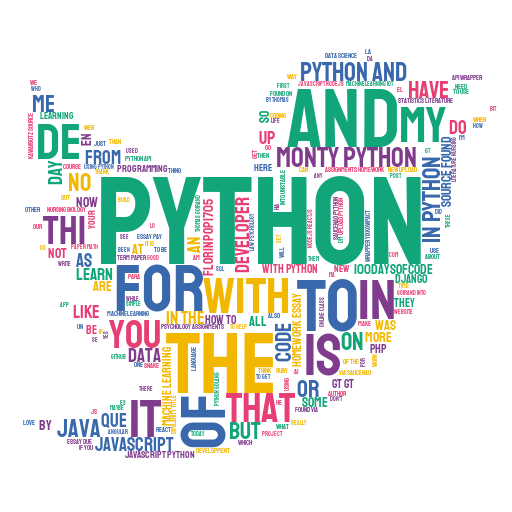

In [26]:
stylecloud.gen_stylecloud(text=corpus, icon_name='fab fa-twitter', output_name=filename, custom_stopwords =['AMP'])
Image(filename=filename)

## Exercise 11

See if you can look at the `stylecloud` documentation here https://github.com/minimaxir/stylecloud and play around with the shape of the word cloud or the different paramaters.

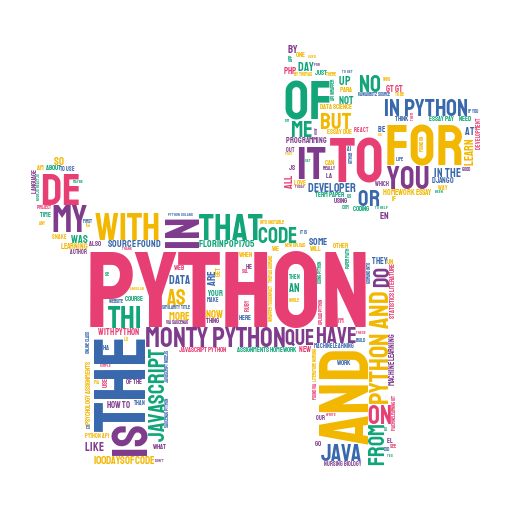

In [27]:
stylecloud.gen_stylecloud(text=corpus, icon_name='fas fa-dog', output_name=filename, custom_stopwords =['AMP'])
Image(filename=filename)

## Exercise 12

Many times the sites we are interested in analyzing data from, do not have apis. Can you generate the word cloud using a more crude method? (Hint: One way is to copy and paste the text from twitter into a string and then pass that into the word cloud.)

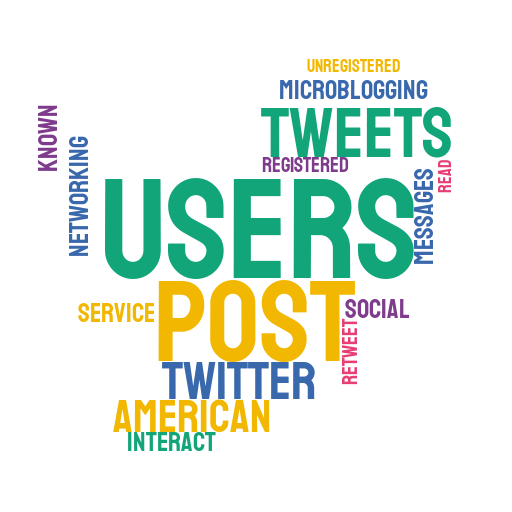

In [29]:
text_from_website ='''
Twitter is an American microblogging and social networking service on which users post and interact with messages known as "tweets". Registered users can post, like and retweet tweets, but unregistered users can only read them.
'''

stylecloud.gen_stylecloud(text=text_from_website, icon_name='fab fa-twitter', output_name=filename)
Image(filename=filename)

# Data Cleaning and Analysis

Now we will do some more cleaning to the text. We didn't have to as much before because the wordlcoud package did that for you. However, now since we are doing a more specific analysis, we will have to clean the data.

## Exercise 13

Can you use a regular expression to strip non alphabet characters? What about replacing new lines with spaces (regular expression not needed for this part).

In [ ]:
# INSERT CODE HERE

print(re.sub("[\W|\d]"," ",corpus))

#corpus_no_chars

# Bar Plot

We will now count the number of words in the twitter searches, and visualize the results! For example we want to see how often people are tweeting about politicians.  However first we need to create a function to count the word occurances.

## Exercise 14

Make a function that given the tweet text and a word, it cleans the text (using the code above) and counts the occurance of that word.

Use `str.count` to count the words. For example `'hello world'.count('hello')` will return `1`.

In [44]:
def clean_and_count(tweet_text, word):
    tweet_text = tweet_text.lower()
    # INSERT CODE HERE

## Exercise 15

We would like to make a bar plot similar to the below except with real data.

In [ ]:
import pandas as pd

data = {'place':['chicago', 'detroit'], 'biden':[4,3], 'trump':[3,5]}
df = pd.DataFrame(data)
df.plot(kind='bar',x='place',y=['biden','trump'])

Construct a `dict` to create a pandas dataframe similar to the example above. Use `clean_and_count` and fill the code below. 

In [ ]:
data = {}
words = ['biden', 'trump']
for word in words:
    places = ['chicago', 'texas']
    data[word] = [] # Here we initialize the list so we can append to it
    data['place'] = places # Here we initilize the places
    for place in places:
        print(word, place)
        search_query = place + ' election'
        # INSERT CODE HERE


df = pd.DataFrame(data)
df

## Plotting

Now we are ready to plot!

In [ ]:
df.plot(kind='bar',x='place',y=words)

Can you think of any other combinations to try?